                          NOBEL PRIZE WINNERS ANALYSIS                          

Gender Distribution:
sex
Male      0.93299
Female    0.06701

Most common birth country of Nobel laureates: United States of America


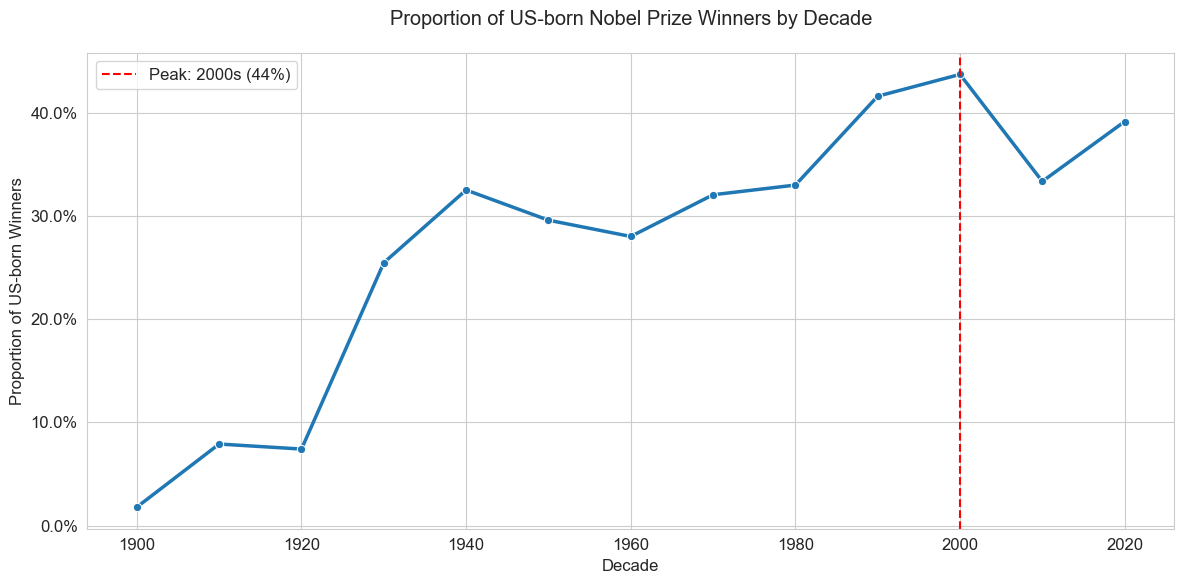

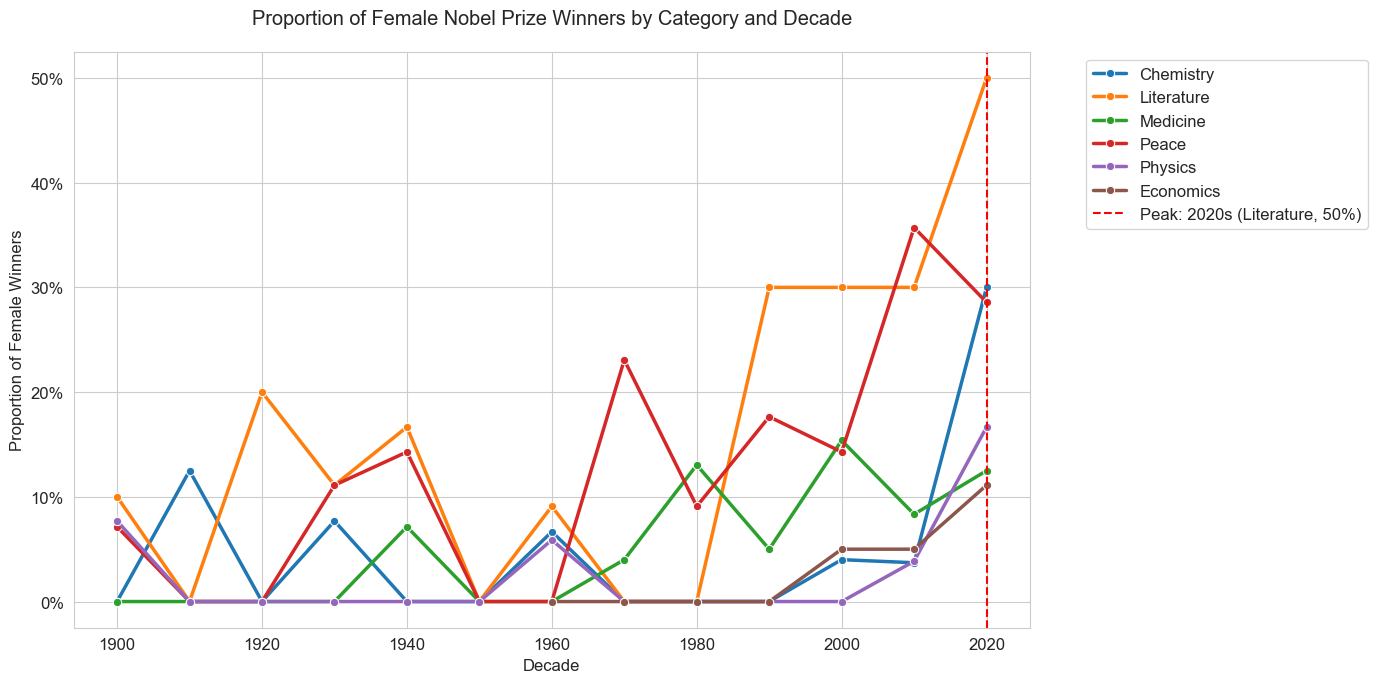


FIRST FEMALE NOBEL LAUREATE: MARIE CURIE, NÉE SKLODOWSKA
Year: 1903
Category: Physics
Birth Country: Russian Empire (Poland)
Prize Motivation: "in recognition of the extraordinary services they have rendered by their joint researches on the radiation phenomena discovered by Professor Henri Becquerel"

REPEAT NOBEL PRIZE WINNERS
full_name
Comité international de la Croix Rouge (International Committee of the Red Cross)    3
Linus Carl Pauling                                                                   2
John Bardeen                                                                         2
Frederick Sanger                                                                     2
Marie Curie, née Sklodowska                                                          2
Office of the United Nations High Commissioner for Refugees (UNHCR)                  2


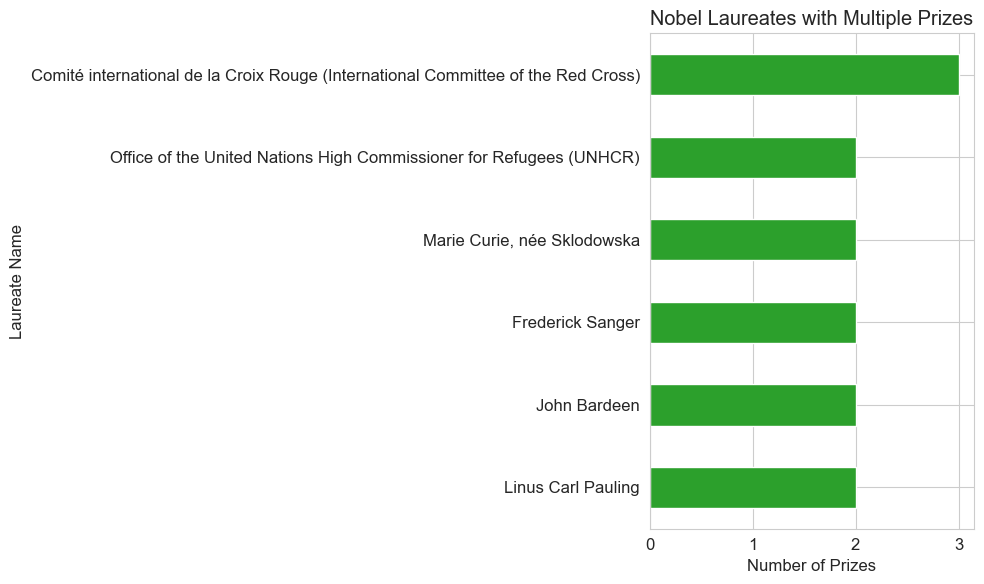

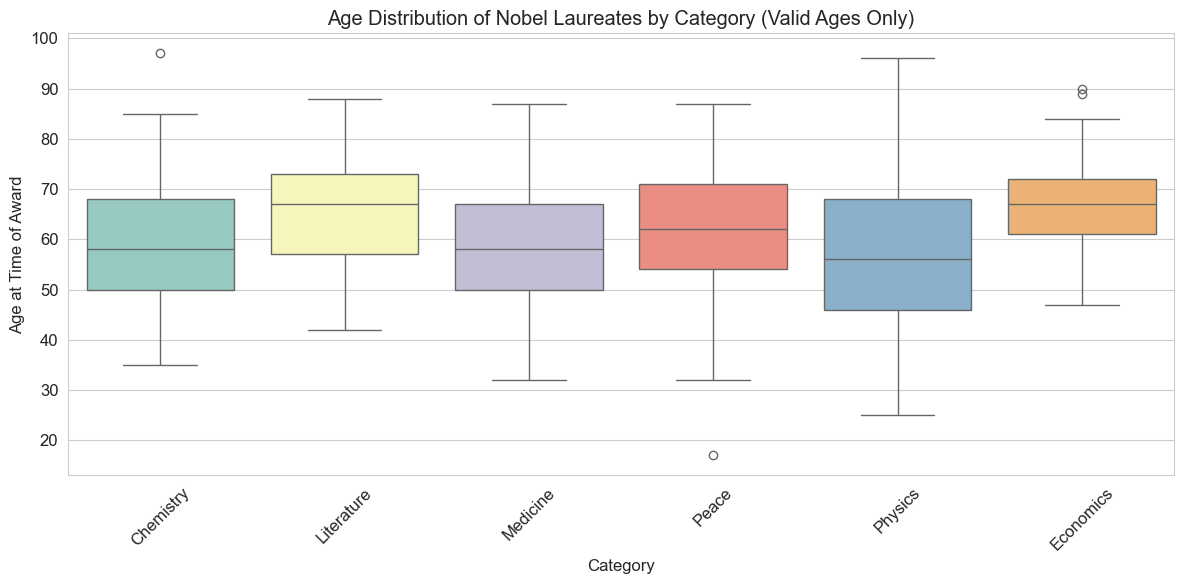

In [5]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# Set style for all visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['font.size'] = 12

# Load the dataset
nobel = pd.read_csv('nobel.csv')

# Fix potential data issues
nobel['birth_country'] = nobel['birth_country'].str.strip()  # Clean whitespace
nobel['sex'] = nobel['sex'].str.strip()

## 1. Basic Statistics with Enhanced Output
print("="*80)
print("NOBEL PRIZE WINNERS ANALYSIS".center(80))
print("="*80)

# Most common gender and birth country of Nobel laureates
gender_counts = nobel["sex"].value_counts(normalize=True)
top_gender = gender_counts.index[0]
top_country = nobel['birth_country'].value_counts().index[0]

print(f"\nGender Distribution:\n{gender_counts.to_string()}")
print(f"\nMost common birth country of Nobel laureates: {top_country}")

## 2. USA-born Winners Analysis with Enhanced Visualization
nobel['usa_born_winner'] = nobel['birth_country'].str.contains('United States|USA', case=False, regex=True)
nobel["decade"] = (np.floor(nobel["year"] / 10) * 10).astype(int)
prop_usa_winners = nobel.groupby('decade', as_index=False)['usa_born_winner'].mean()

# Highest proportion of US-born winners
max_decade_usa = prop_usa_winners.loc[prop_usa_winners['usa_born_winner'].idxmax()]

# Enhanced USA-born winners plot
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x="decade", y="usa_born_winner", data=prop_usa_winners, 
                 marker='o', linewidth=2.5, color='#1f77b4')
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.title('Proportion of US-born Nobel Prize Winners by Decade', pad=20)
plt.xlabel('Decade')
plt.ylabel('Proportion of US-born Winners')
plt.axvline(x=max_decade_usa['decade'], color='red', linestyle='--', 
           label=f'Peak: {max_decade_usa["decade"]}s ({max_decade_usa["usa_born_winner"]:.0%})')
plt.legend()
plt.tight_layout()
plt.show()

## 3. Female Winners Analysis with Enhanced Visualization
nobel["female_winner"] = nobel["sex"] == "Female"
prop_female_winners = nobel.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()

# Highest proportion of female laureates
max_female = prop_female_winners.loc[prop_female_winners['female_winner'].idxmax()]
max_female_dict = {max_female['decade']: max_female['category']}

# Enhanced female winners plot
plt.figure(figsize=(14, 7))
ax = sns.lineplot(x='decade', y='female_winner', hue='category', 
                 data=prop_female_winners, marker='o', linewidth=2.5,
                 palette='tab10')
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.title('Proportion of Female Nobel Prize Winners by Category and Decade', pad=20)
plt.xlabel('Decade')
plt.ylabel('Proportion of Female Winners')
plt.axvline(x=max_female['decade'], color='red', linestyle='--', 
           label=f'Peak: {max_female["decade"]}s ({max_female["category"]}, {max_female["female_winner"]:.0%})')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 4. First Woman to Win a Nobel Prize with Enhanced Output
first_woman = nobel[nobel['sex'] == 'Female'].sort_values('year').iloc[0]
print("\n" + "="*80)
print(f"FIRST FEMALE NOBEL LAUREATE: {first_woman['full_name'].upper()}")
print("="*80)
print(f"Year: {first_woman['year']}")
print(f"Category: {first_woman['category']}")
print(f"Birth Country: {first_woman['birth_country']}")
print(f"Prize Motivation: {first_woman['motivation']}")

## 5. Repeat Winners Analysis with Enhanced Visualization
repeat_winners = nobel['full_name'].value_counts().loc[lambda x: x >= 2]
print("\n" + "="*80)
print("REPEAT NOBEL PRIZE WINNERS")
print("="*80)
print(repeat_winners.to_string())

# Enhanced repeat winners visualization
plt.figure(figsize=(10, 6))
repeat_winners.sort_values().plot(kind='barh', color='#2ca02c')
plt.title('Nobel Laureates with Multiple Prizes')
plt.xlabel('Number of Prizes')
plt.ylabel('Laureate Name')
plt.tight_layout()
plt.show()

## 6. Additional Analysis: Age at Award 
# More robust date parsing
nobel['birth_date'] = pd.to_datetime(nobel['birth_date'], errors='coerce')
nobel['birth_year'] = nobel['birth_date'].dt.year
nobel['age_at_award'] = nobel['year'] - nobel['birth_year']

# Filter out invalid ages
valid_ages = nobel[nobel['age_at_award'].between(10, 100)]

plt.figure(figsize=(12, 6))
# Fixed the palette warning by using hue parameter correctly
sns.boxplot(x='category', y='age_at_award', hue='category', 
           data=valid_ages, palette='Set3', legend=False)
plt.title('Age Distribution of Nobel Laureates by Category (Valid Ages Only)')
plt.xlabel('Category')
plt.ylabel('Age at Time of Award')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()